In [2]:
#https://github.com/yaelhezki/MiniProject1 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [4]:
df = pd.read_csv("laptop_price - dataset.csv")

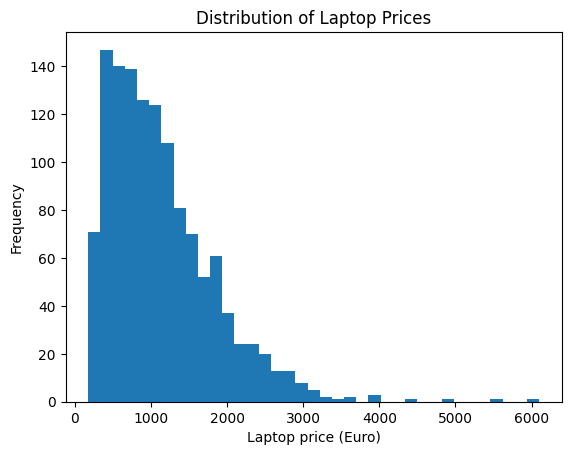

In [25]:
#1. Plot the price of all the laptops
#an histogram of distribution of laptop prices
laptop_prices = df['Price (Euro)']

plt.hist(laptop_prices, bins='auto')

plt.title('Distribution of Laptop Prices')
plt.xlabel('Laptop price (Euro)')
plt.ylabel('Frequency')
plt.show()


the company that has on avarage the most expensive laptop is Razer with an avarage price of 3346.1428571428573


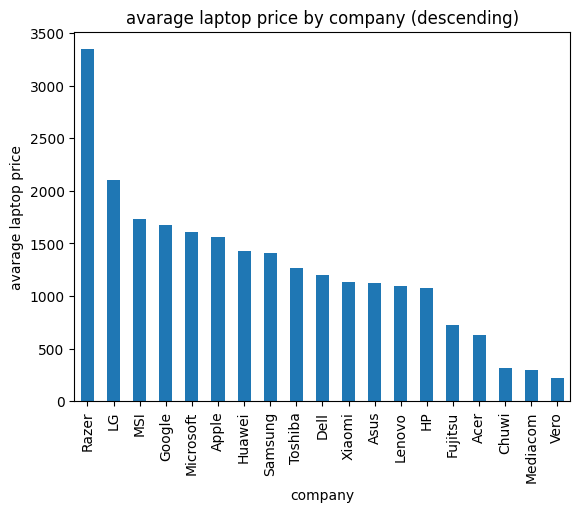

the average laptop price for each company (descending):
 Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


In [40]:
#2. Which company has on average the most expensive laptop? What is the average laptop price for each company?
#an histogram of the avarage laptop price for each company
company = df['Company']
prices_by_company = df.groupby('Company')['Price (Euro)']
avg_price_by_company = prices_by_company.mean().sort_values(ascending=False)
avg_price_by_company.plot(kind='bar')

max_avg_price = max(avg_price_by_company)
max_avg_price_company = avg_price_by_company.idxmax()
print ("\nthe company that has on avarage the most expensive laptop is", max_avg_price_company, "with an avarage price of", max_avg_price)

plt.title('avarage laptop price by company (descending)')
plt.xlabel('company')
plt.ylabel('avarage laptop price')
plt.show()

print ("the average laptop price for each company (descending):\n", avg_price_by_company.sort_values(ascending=False))

